In [2]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import yfinance as yf
import os

In [3]:
import pandas as pd

# Read the CSV file into a DataFrame and explicitly parse the 'timestamp' column as datetime objects
eth = pd.read_csv('my_coins/eth-usd.csv')

# Display the first few rows of the DataFrame
print(eth.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984  


In [4]:
def display_ETH_graph():
# Plot the price of ETH over the specified interval
    plt.figure(figsize=(10, 6))
    plt.plot(eth['Date'], eth['Close'], label='ETH Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('ETH Price Over Time')
    plt.legend()
    plt.grid(True)
    plt.show() 

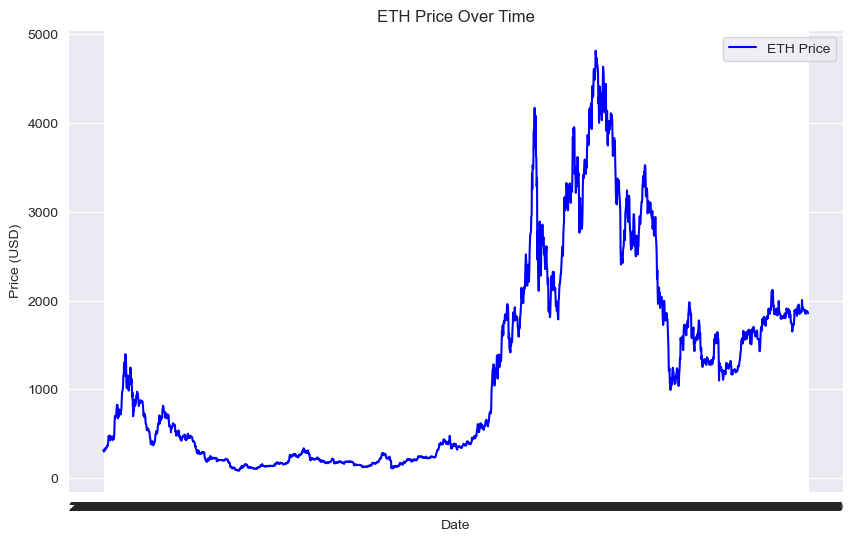

In [5]:
display_ETH_graph()

In [6]:
import pandas as pd
import yfinance as yf

def display_correlation():
    cryptocurrencies = ['BTC-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD', 'EOS-USD', 'ADA-USD', 'XLM-USD', 'XMR-USD', 'TRX-USD', 'LINK-USD', 'DOGE-USD']
    
    # Fetch historical market data for Bitcoin
    eth = yf.download('ETH-USD', start='2017-01-01', end='2023-08-01')
    # Create a DataFrame to store the correlation coefficients
    correlation_data = pd.DataFrame(columns=['Cryptocurrency', 'Correlation'])
    # Calculate the correlation coefficient between Bitcoin and other cryptocurrencies
    for crypto in cryptocurrencies:
        crypto_data = yf.download(crypto, start='2017-01-01', end='2023-08-01')
        merged_data = pd.merge(eth['Close'], crypto_data['Close'], on='Date')
        correlation = merged_data.corr().iloc[0, 1]
        correlation_data = correlation_data.append({'Cryptocurrency': crypto, 'Correlation': correlation}, ignore_index=True)
    # Sort the DataFrame by correlation coefficient (descending)
    correlation_data = correlation_data.sort_values(by='Correlation', ascending=False)
    # Select ten cryptocurrencies with positive correlation coefficients
    positive_correlated_cryptos = correlation_data.head(10)
    # Select ten cryptocurrencies with negative correlation coefficients
    negative_correlated_cryptos = correlation_data.tail(10)
    # Display the results
    print("Top 10 cryptocurrencies positively correlated with Bitcoin:")
    print(positive_correlated_cryptos)
    print("\nTop 10 cryptocurrencies negatively correlated with Bitcoin:")
    print(negative_correlated_cryptos)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


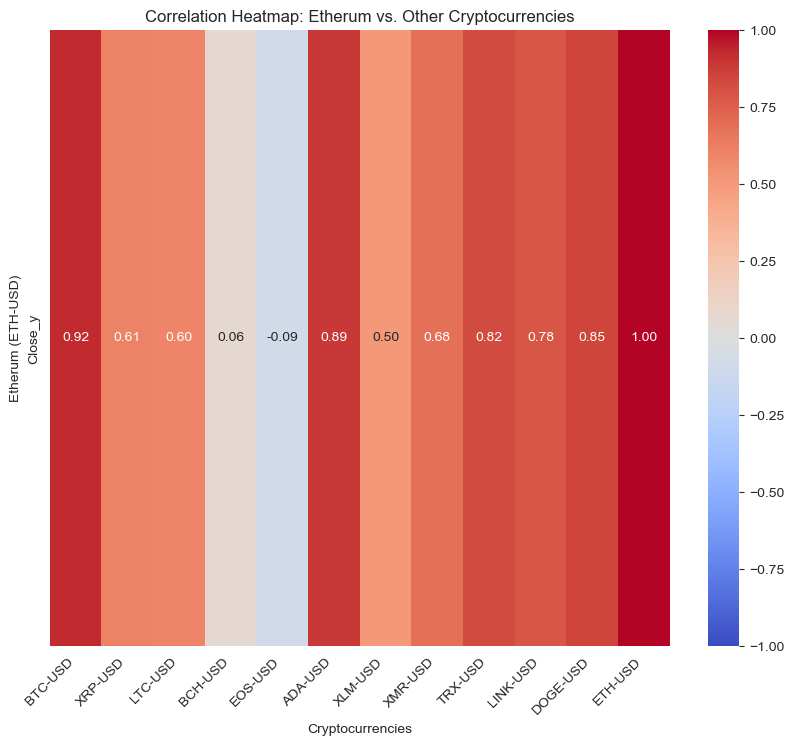

In [7]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap():
    
    cryptocurrencies = ['BTC-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD', 'EOS-USD', 'ADA-USD', 'XLM-USD', 'XMR-USD', 'TRX-USD', 'LINK-USD', 'DOGE-USD']

    # Fetch historical market data for Bitcoin
    eth = yf.download('ETH-USD', start='2017-01-01', end='2023-08-01')

    # Create a DataFrame to store the correlation coefficients
    correlation_data = pd.DataFrame()

    # Calculate the correlation coefficient between Bitcoin and other cryptocurrencies
    for crypto in cryptocurrencies:
        crypto_data = yf.download(crypto, start='2017-01-01', end='2023-08-01')
        merged_data = pd.merge(eth['Close'], crypto_data['Close'], on='Date')
        correlation_data[crypto] = merged_data.corr().iloc[0, 1:]

    # Calculate the correlation coefficient between Bitcoin and itself (should be 1.0)
    correlation_data['ETH-USD'] = 1.0

    # Create a heatmap of the correlation coefficients
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Correlation Heatmap: Etherum vs. Other Cryptocurrencies')
    plt.xlabel('Cryptocurrencies')
    plt.ylabel('Etherum (ETH-USD)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_correlation_heatmap()


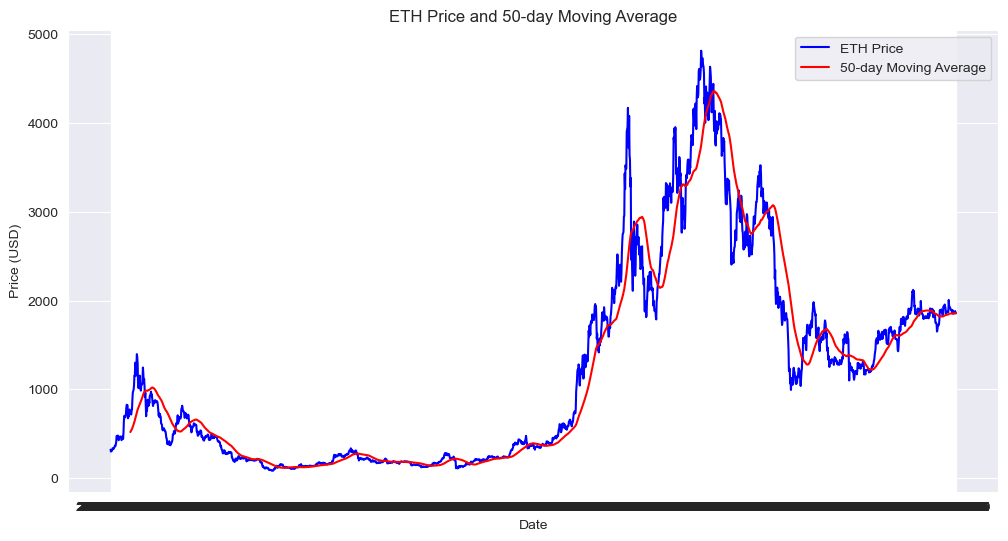

In [8]:
def display_moving_average():
    # Calculate 50-day moving average
    eth['50-day Moving Average'] = eth['Close'].rolling(window=50).mean()

    # Plot the closing price and the moving average
    plt.figure(figsize=(12, 6))
    plt.plot(eth['Date'], eth['Close'], label='ETH Price', color='blue')
    plt.plot(eth['Date'], eth['50-day Moving Average'], label='50-day Moving Average', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('ETH Price and 50-day Moving Average')
    plt.legend()
    plt.grid(True)
    plt.show()
display_moving_average()

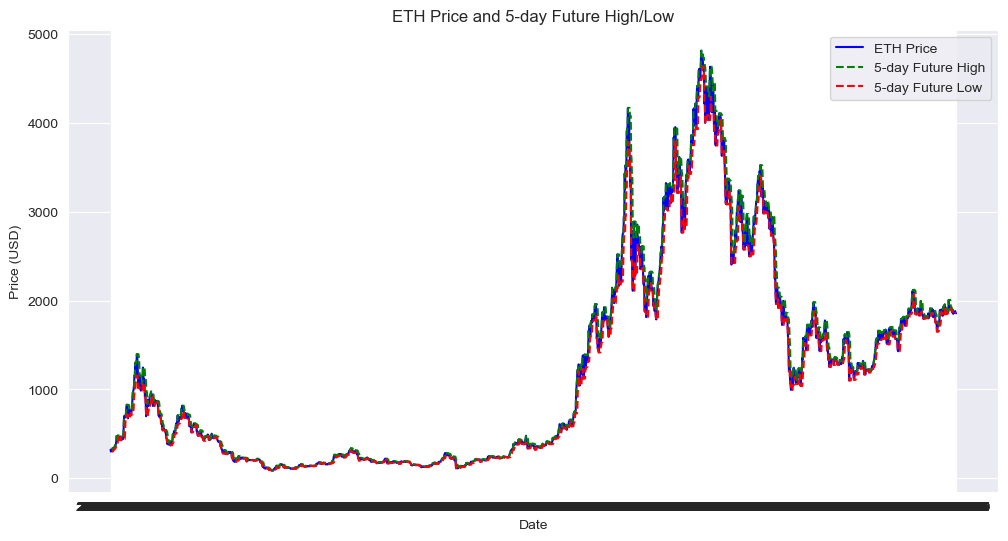

In [9]:
def display_future_high_low(future_period=5):
    # Predict future high and low lines (this is a basic example)
    eth['Future High'] = eth['Close'].rolling(window=future_period).max()
    eth['Future Low'] = eth['Close'].rolling(window=future_period).min()
    # Plot the BTC price and the future high and low lines
    plt.figure(figsize=(12, 6))
    plt.plot(eth['Date'], eth['Close'], label='ETH Price', color='blue')
    plt.plot(eth['Date'], eth['Future High'], label=f'{future_period}-day Future High', color='green', linestyle='dashed')
    plt.plot(eth['Date'], eth['Future Low'], label=f'{future_period}-day Future Low', color='red', linestyle='dashed')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'ETH Price and {future_period}-day Future High/Low')
    plt.legend()
    plt.grid(True)
    plt.show()
    # Call the function to display the plot with future high and low lines for BTC
display_future_high_low(future_period=5)

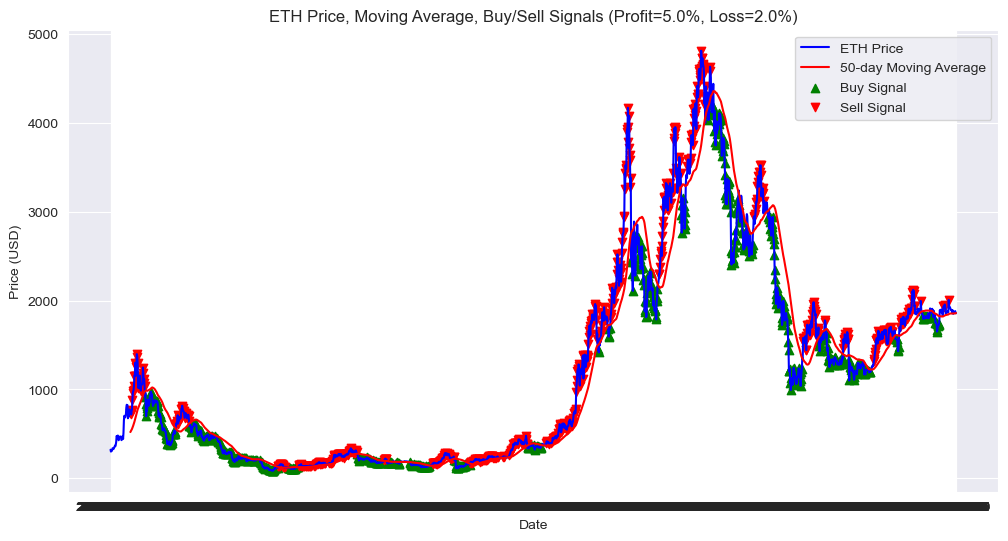

In [10]:
def display_buy_sell_points(moving_average_period=50, profit_margin=0.05, loss_margin=0.02):

    # Calculate the moving average
    eth['Moving Average'] = eth['Close'].rolling(window=moving_average_period).mean()
    # Calculate potential buy and sell points
    eth['Buy Signal'] = eth['Close'] < (1 - loss_margin) * eth['Moving Average']
    eth['Sell Signal'] = eth['Close'] > (1 + profit_margin) * eth['Moving Average']
    # Plot the BTC price, moving average, and buy/sell signals
    plt.figure(figsize=(12, 6))
    plt.plot(eth['Date'], eth['Close'], label='ETH Price', color='blue')
    plt.plot(eth['Date'], eth['Moving Average'], label=f'{moving_average_period}-day Moving Average', color='red')
    plt.scatter(eth.loc[eth['Buy Signal'], 'Date'], eth.loc[eth['Buy Signal'], 'Close'], marker='^', color='green', label='Buy Signal')
    plt.scatter(eth.loc[eth['Sell Signal'], 'Date'], eth.loc[eth['Sell Signal'], 'Close'], marker='v', color='red', label='Sell Signal')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'ETH Price, Moving Average, Buy/Sell Signals (Profit={profit_margin*100}%, Loss={loss_margin*100}%)')
    plt.legend()
    plt.grid(True)
    plt.show()

display_buy_sell_points(moving_average_period=50, profit_margin=0.05, loss_margin=0.02)


In [11]:
import yfinance as yf

def predict_market_state(cryptocurrencies):
    predictions = {}

    for crypto in cryptocurrencies:
        data = yf.download(crypto, start='2017-01-01', end='2023-08-01')
        if len(data) >= 2:
            current_price = data['Close'].iloc[-1]
            previous_price = data['Close'].iloc[-2]
            if current_price > previous_price:
                prediction = 'up'
            else:
                prediction = 'down'
            predictions[crypto] = prediction

    return predictions

cryptocurrencies = ['BTC-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD', 'EOS-USD', 'ADA-USD', 'XLM-USD', 'XMR-USD', 'TRX-USD', 'LINK-USD', 'DOGE-USD'] 

predictions = predict_market_state(cryptocurrencies)

# Display the predictions
print(predictions)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'BTC-USD': 'down', 'XRP-USD': 'down', 'LTC-USD': 'down', 'BCH-USD': 'down', 'EOS-USD': 'down', 'ADA-USD': 'down', 'XLM-USD': 'down', 'XMR-USD': 'up', 'TRX-USD': 'down', 'LINK-USD': 'down', 'DOGE-USD': 'down'}


In [12]:

def add_volatility(eth, coin='ETH-USD'):
    """
    data: input data, pandas DataFrame
    coin: default is 'BTC-USD'. It could be changed as needed
    This function calculates the volatility and close_off_high of the given coin in 24 hours, 
    and adds the result as new columns to the DataFrame.
    Return: DataFrame with added columns
    """
    coin_close_columns = {
        'ETH-USD': 'Close',
    }
    if coin not in coin_close_columns:
        raise ValueError(f"Column name for {coin} close price not found.") 
    close_col = coin_close_columns[coin]
    # Calculate the price change in 24 hours (volatility)
    eth[coin + '_volatility'] = eth[close_col].pct_change(periods=1) * 100

    # Check if the 'High' and 'Low' columns exist for the given coin
    if 'High' in eth.columns and 'Low' in eth.columns:
        # Calculate the close_off_high for each day
        eth[coin + '_close_off_high'] = 2 * ((eth['High'] - eth[close_col]) / 
                                              (eth['High'] - eth['Low'])) - 1
    else:
        # If 'High' and 'Low' columns are not present, we do not add the 'close_off_high' column
        pass
    return eth

data_with_volatility = add_volatility(eth, coin='ETH-USD')


In [13]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2091 non-null   object 
 1   Open                    2091 non-null   float64
 2   High                    2091 non-null   float64
 3   Low                     2091 non-null   float64
 4   Close                   2091 non-null   float64
 5   Adj Close               2091 non-null   float64
 6   Volume                  2091 non-null   int64  
 7   50-day Moving Average   2042 non-null   float64
 8   Future High             2087 non-null   float64
 9   Future Low              2087 non-null   float64
 10  Moving Average          2042 non-null   float64
 11  Buy Signal              2091 non-null   bool   
 12  Sell Signal             2091 non-null   bool   
 13  ETH-USD_volatility      2090 non-null   float64
 14  ETH-USD_close_off_high  2091 non-null   

In [16]:
eth.describe()


,Open,High,Low,Close,Adj Close,Volume,50-day Moving Average,Future High,Future Low,Moving Average,ETH-USD_volatility,ETH-USD_close_off_high
count,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2.091000e+03,2042.000000,2087.000000,2087.000000,2042.000000,2090.000000,2091.000000
mean,1192.183520,1228.052428,1152.205961,1192.713224,1192.713224,1.236399e+10,1193.606364,1248.362548,1135.916628,1193.606364,0.204400,-0.063507
std,1143.420757,1177.147607,1104.790313,1142.916798,1142.916798,1.038839e+10,1130.444985,1192.580911,1089.882387,1130.444985,4.867784,0.620426
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08,118.225343,90.593300,84.308296,118.225343,-42.347221,-1.000000
25%,223.975136,228.891449,217.179642,224.001167,224.001167,4.796381e+09,216.545783,230.940712,212.728516,216.545783,-2.035276,-0.649089
50%,697.922974,723.752991,668.833984,696.530029,696.530029,9.723674e+09,672.199262,731.520142,672.656982,672.199262,0.078194,-0.094537
75%,1842.348206,1876.453613,1799.176453,1843.145020,1843.145020,1.716293e+10,1831.699673,1892.862061,1796.114868,1831.699673,2.543201,0.487844
max,4810.071289,4891.704590,4718.039062,4812.087402,4812.087402,8.448291e+10,4356.180332,4812.087402,4636.174316,4356.180332,26.458071,1.000000


In [17]:
def create_model_data(eth):
    """
    data: pandas DataFrame
    This function drops unnecessary columns and reverses the order of DataFrame based on descending dates.
    Return: pandas DataFrame
    """
    # Select the necessary columns for Bitcoin, Ethereum, and Apple Inc.
    coin_columns = {
        'ETH': ['Date', 'Close', 'Volume']
    }

    # Combine the selected columns for coin
    selected_columns = []
    for coin, columns in coin_columns.items():
        selected_columns.extend([coin + '_' + col for col in columns[1:]])

    # Filter the DataFrame to include only the selected columns
    eth = eth[coin_columns['ETH']]
    
    # Sort the DataFrame by 'Date' in ascending order
    eth = eth.sort_values(by='Date')

    # Reset the index to ensure the DataFrame index is in consecutive order
    eth = eth.reset_index(drop=True)

    return eth


In [18]:
model_data = create_model_data(eth)
model_data.head()


,Date,Close,Volume
0,2017-11-09,320.884003,893249984
1,2017-11-10,299.252991,885985984
2,2017-11-11,314.681000,842300992
3,2017-11-12,307.907990,1613479936
4,2017-11-13,316.716003,1041889984


In [19]:
model_data = model_data.set_index('Date')
model_data.index = pd.to_datetime(model_data.index,unit='ns')
print(model_data.index)

DatetimeIndex(['2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12',
               '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16',
               '2017-11-17', '2017-11-18',
               ...
               '2023-07-22', '2023-07-23', '2023-07-24', '2023-07-25',
               '2023-07-26', '2023-07-27', '2023-07-28', '2023-07-29',
               '2023-07-30', '2023-07-31'],
              dtype='datetime64[ns]', name='Date', length=2091, freq=None)


In [20]:
def split_data(eth, training_size=0.8):
    
    """
    data: pandas DataFrame
    training_size: the proportion of data to include in the training set (default is 0.8)
    This function splits the input DataFrame into training and testing sets.
    Returns: two pandas DataFrames (train_set, test_set)
    """
    # Calculate the index where to split the data based on the training_size
    split_index = int(len(eth) * training_size)

    # Split the data into training and testing sets
    train_set = eth.iloc[:split_index]
    test_set = eth.iloc[split_index:]

    return train_set, test_set

In [21]:
train_set, test_set = split_data(model_data)

In [22]:

print(train_set.shape, test_set.shape)

(1672, 2) (419, 2)


In [23]:
def create_inputs(eth, window_len=10):
    """
    btc: pandas DataFrame, this could be either training_set or test_set
    window_len: an integer to be used as the look back window for creating a single input sample.
    This function will create input array X from the given dataset and will normalize 'Close' and 'Volume' between 0 and 1.
    Return: X, the input for our model as a Python list, which later needs to be converted to a numpy array.
    """
    inputs = []
    for i in range(len(eth) - window_len):
        temp_set = eth[i:(i + window_len)].copy()
        inputs.append(temp_set)
        inputs[i]['Close'] = inputs[i]['Close'] / inputs[i]['Close'].iloc[0] - 1
        inputs[i]['Volume'] = inputs[i]['Volume'] / inputs[i]['Volume'].iloc[0] - 1
    return inputs


In [24]:
# Assuming you have a DataFrame named 'btc_data'
input_samples = create_inputs(eth, window_len=10)


In [25]:
def create_outputs(eth, window_len=10):
    """
    eth: pandas DataFrame, this could be either training_set or test_set
    window_len: an integer to be used as the look back window for creating a single output sample.
    This function will create output array y from the given dataset and will normalize 'Close' between 0 and 1.
    Return: y, the output for our model as a Python list, which later needs to be converted to a numpy array.
    """
    outputs = []
    for i in range(len(eth) - window_len):
        temp_set = eth['Close'].iloc[i + window_len] / eth['Close'].iloc[i] - 1
        outputs.append(temp_set)
    return outputs


In [26]:
# Assuming you have a DataFrame named 'btc_data'
output_samples = create_outputs(eth, window_len=10)
print("Output Labels for Bitcoin (BTC):")
print(output_samples)


Output Labels for Bitcoin (BTC):
[0.10440527842520297, 0.22548486516617205, 0.1452899960791223, 0.23625245539211992, 0.29505923502743747, 0.406597717375516, 0.39872871572897983, 0.42428464111663544, 0.4451373761038835, 0.3604306201193095, 0.2063767382101389, 0.2191912313621467, 0.2945025326809838, 0.21751362220054915, 0.135767015648959, -0.009911332072646162, -0.006423223822188628, -0.09068375680442686, -0.09565221645139188, -0.03567547168301499, 0.10754743675420642, -0.012061812437512809, 0.1041625088805731, 0.40561533861743904, 0.5085596391919829, 0.47981719464590467, 0.4773927473612707, 0.6244247709978346, 0.6573704742663358, 0.7425241032323413, 0.746186865780073, 0.8543061868078858, 0.5938761998239808, 0.035965365463617394, 0.023649366626324886, -0.002397140623858318, 0.11890747954609582, 0.1114995869090134, 0.05953957546877908, -0.07251289300389019, -0.08856915958964962, -0.12432025412996595, -0.07834967354271716, 0.144890803991641, 0.22944109403036728, 0.3869087809543388, 0.28085

In [27]:
def to_array(data):
  """
  data: DataFrame
  This function will convert list of inputs to a numpy array
  Return: numpy array
  """
  x = [np.array(data[i]) for i in range (len(data))]
  return np.array(x)

In [28]:
# Assuming you have the create_inputs, create_outputs, and to_array functions defined

# Create input samples and output labels for the training set
X_train = create_inputs(train_set)
Y_train = create_outputs(train_set)

# Create input samples and output labels for the test set
X_test = create_inputs(test_set)
Y_test = create_outputs(test_set)

# Convert the lists of input samples to numpy arrays
x_train, x_test = to_array(X_train), to_array(X_test)


In [29]:

print(x_train.shape)
print(x_test.shape)

(1662, 10, 2)
(409, 10, 2)


In [30]:
train_data = model_data.iloc[200:]
test_data = model_data.iloc[:200]

In [31]:
window_len = 10

# Create input samples for the training set
train_inputs = create_inputs(train_data, window_len)

# Create input samples for the test set
test_inputs = create_inputs(test_data, window_len)

In [32]:
print(train_data.shape)
print(test_data.shape)

(1891, 2)
(200, 2)


In [33]:
def normalise_zero_base(continuous):
    return continuous / continuous.iloc[0] - 1

def normalise_min_max(continuous):
    return (continuous - continuous.min()) / (model_data.max() - continuous.min())

In [34]:

aim = 'Close'


In [35]:
def extract_window_data(continuous, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(continuous) - window_len):
        tmp = continuous[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [36]:
import matplotlib.pyplot as plt

def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('BTC-USD', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    plt.show()


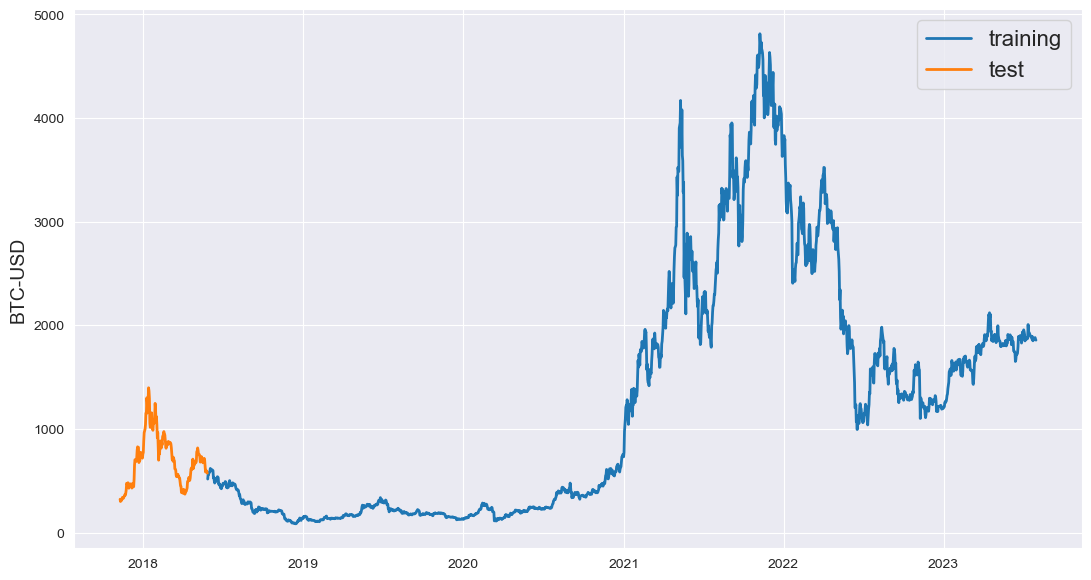

In [37]:
line_plot(train_data[aim], test_data[aim], 'training', 'test', title='')

In [38]:
def prepare_data(continuous, aim, window_len=10, zero_base=True, test_size=0.2):
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[aim][window_len:].values
    y_test = test_data[aim][window_len:].values
    if zero_base:
        y_train = y_train / train_data[aim][:-window_len].values - 1
        y_test = y_test / test_data[aim][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

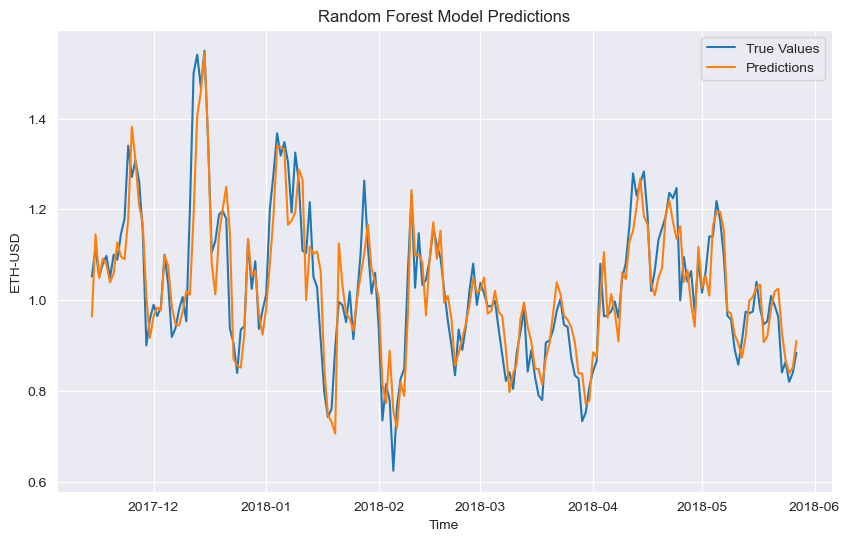

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Assuming you have the prepare_data function and model_data, aim variables already defined

# Set the random seed for reproducibility
np.random.seed(245)

# Set hyperparameters
window_len = 5
test_size = 0.2
zero_base = True

# Prepare the data using the prepare_data function (assuming model_data and aim are defined)
train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
    model_data, aim, window_len=window_len, zero_base=zero_base, test_size=test_size)

# Reshape the input data to be 2D for RandomForestRegressor
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Invert the scaling if necessary
if zero_base:
    y_test = y_test + 1
    y_pred = y_pred + 1

# Save the model to a file
model_filename = 'eth_rf_model.joblib'
joblib.dump(model, model_filename)

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[window_len:], y_test, label='True Values')
plt.plot(test_data.index[window_len:], y_pred, label='Predictions')
plt.xlabel('Time')
plt.ylabel('ETH-USD')
plt.title('Random Forest Model Predictions')
plt.legend()
plt.show()


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²) Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0046
Mean Absolute Error (MAE): 0.0499
Mean Absolute Percentage Error (MAPE): 4.89%
R-squared (R²) Score: 0.8228
